In [9]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups

In [10]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

In [11]:
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)

In [12]:
msg_train = twenty_train.data
target_train = twenty_train.target

In [13]:
msg_test = twenty_test.data
target_test = twenty_test.target

In [14]:
classes = twenty_train.target_names 

In [15]:
msg = msg_train + msg_test

In [21]:
classes

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [22]:
len(msg)

18846

In [23]:
t = np.array(list(target_train) + list(target_test))

In [24]:
print("\n".join(msg_train[0].split("\n")[:4]))

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park


Costruisce matrice termini-documenti con count del numero di occorrenze

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(msg)

Dizionario dei termini considerati nella collezione

In [26]:
terms = np.array(count_vect.get_feature_names())

In [30]:
X_counts.shape

(18846, 173762)

Restituisci termini e occorrenze per un documento dato

In [31]:
doc_idx = 6
l = np.array([X_counts[doc_idx,i] for i in range(X_counts.shape[1])])
terms_idx = np.array(np.argwhere(l > 0).reshape(1,-1)[0])
print('Messaggio #{0:3d}: {1:3d} termini diversi nel testo, {2:5.3f}% di tutto il vocabolario'.format(doc_idx, terms_idx.shape[0], 
                terms_idx.shape[0]/X_counts.shape[1]*100))

print(list(zip(terms[terms_idx],l[l>0])))

Messaggio #  6:  70 termini diversi nel testo, 0.040% di tutto il vocabolario
[('12', 1), ('accidentally', 1), ('and', 1), ('astrocytomas', 1), ('because', 1), ('bmdelane', 2), ('bouncing', 1), ('brain', 1), ('brian', 2), ('chicago', 1), ('couldn', 1), ('debra', 1), ('delaney', 1), ('delete', 1), ('directly', 1), ('edu', 2), ('email', 1), ('everyone', 1), ('few', 1), ('file', 1), ('for', 2), ('from', 1), ('glad', 1), ('hit', 1), ('hmmm', 1), ('info', 1), ('instead', 1), ('last', 1), ('lines', 1), ('mail', 1), ('manning', 1), ('midway', 1), ('my', 1), ('news', 1), ('of', 3), ('on', 1), ('organization', 1), ('people', 1), ('probs', 1), ('publicly', 1), ('quads', 1), ('reply', 1), ('request', 1), ('responded', 1), ('rm', 1), ('rn', 1), ('sean', 1), ('september', 1), ('sharon', 1), ('so', 1), ('subject', 1), ('sure', 1), ('thank', 2), ('thanks', 2), ('there', 1), ('this', 1), ('thought', 1), ('through', 1), ('to', 3), ('treatment', 2), ('trying', 1), ('tumor', 1), ('uchicago', 2), ('univer

In [32]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)
X_tfidf.shape

(18846, 173762)

In [33]:
doc_idx =1
l1 = np.array([X_tfidf[doc_idx,i] for i in range(X_counts.shape[1])])
l_ind = np.argwhere(l1 > 0).reshape(1,-1)[0]
#print(terms[l_ind])
l_val = l1[l_ind]
print(list(zip(terms[l_ind],l_val)))

[('11', 0.051028442680077224), ('1qvfo9innc3s', 0.14403286875043725), ('800', 0.07193238616602284), ('acceleration', 0.09625401926160045), ('adapters', 0.10383216148559032), ('add', 0.12477323486241704), ('and', 0.050376546929291305), ('answered', 0.08296211979899024), ('are', 0.02337597946678537), ('article', 0.024964919849871436), ('attained', 0.1186094398856234), ('base', 0.06816230114669868), ('be', 0.022352224201986317), ('brave', 0.09726795663363846), ('brief', 0.08617634005386285), ('call', 0.10325323544468093), ('cards', 0.06984620923263532), ('carson', 0.17676730505268132), ('clock', 0.3658750611490335), ('cpu', 0.07683054253961187), ('day', 0.049113570666663484), ('days', 0.05630008492652677), ('detailing', 0.10658705783556864), ('disk', 0.06331585846369911), ('done', 0.05170054688154026), ('edu', 0.060330031175403545), ('especially', 0.058361000140917656), ('experiences', 0.16149499384698648), ('fair', 0.07371421335662626), ('final', 0.13687035318278185), ('floppies', 0.0937

In [48]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
#fs = SelectKBest(mutual_info_classif, k='all').fit(X_tfidf, t)
#np.savetxt('scores_tc_features', fs.scores_)
#fscores = fs.scores_

In [34]:
fscores = np.loadtxt('scores_tc_features')

In [35]:
fscores[:40]

array([0.11834061, 0.11040454, 0.00172379, 0.00109669, 0.00015652,
       0.00031278, 0.00078072, 0.00046828, 0.00015631, 0.00015631,
       0.00015631, 0.00015604, 0.00015631, 0.00015631, 0.00015631,
       0.00015631, 0.00140642, 0.00015647, 0.00015647, 0.00015647,
       0.00015631, 0.00015631, 0.00015631, 0.00015631, 0.00015631,
       0.00015631, 0.00015631, 0.00015631, 0.00015783, 0.00015647,
       0.00047108, 0.00015647, 0.00016936, 0.00015647, 0.00015783,
       0.00015631, 0.00015631, 0.00015631, 0.00015631, 0.00015631])

In [36]:
idx = np.argsort(fscores)[::-1]

In [37]:
print(list(zip(terms[idx[:40]],fscores[idx[:40]])))

[('from', 2.9901835823114293), ('subject', 2.9901835823114293), ('lines', 2.9827129582295764), ('organization', 2.8872340585958653), ('the', 2.8093653827225817), ('to', 2.6949242835789966), ('of', 2.635742296260702), ('in', 2.5521815824076737), ('and', 2.502090711880774), ('is', 2.2964297324563514), ('for', 2.186490849513726), ('that', 2.15680449501269), ('it', 2.150922101493323), ('re', 2.128640694507527), ('edu', 1.987546025987935), ('on', 1.8384516286475932), ('this', 1.8005533913662404), ('have', 1.7784225793395665), ('you', 1.7457368291500561), ('be', 1.701777010644354), ('with', 1.6765310682995458), ('not', 1.6542259297958384), ('are', 1.5849222441032127), ('writes', 1.5803993209674478), ('or', 1.553818192849759), ('but', 1.5523994291802687), ('if', 1.5483073888132615), ('article', 1.4247030094428226), ('as', 1.3698130986541506), ('posting', 1.3592888090685964), ('can', 1.3556071519627912), ('at', 1.3427357712444694), ('host', 1.3004314553968106), ('nntp', 1.286307512642393), ('c

Considera le sole feature più significative

In [38]:
n_terms = 3000
X_red = X_tfidf[:,idx[:n_terms]]

In [39]:
X_red.shape

(18846, 3000)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X_red, t, test_size=0.3)

In [41]:
# Machine Learning
# Training Naive Bayes (NB) classifier on training data.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, t_train)

In [42]:
y = clf.predict(X_test)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y,t_test)

0.7808631057658295

/Users/giorgio/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/giorgio/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/giorgio/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/giorgio/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/giorgio/opt/anaconda3/lib/python3.7/_collections_abc.py:841: 

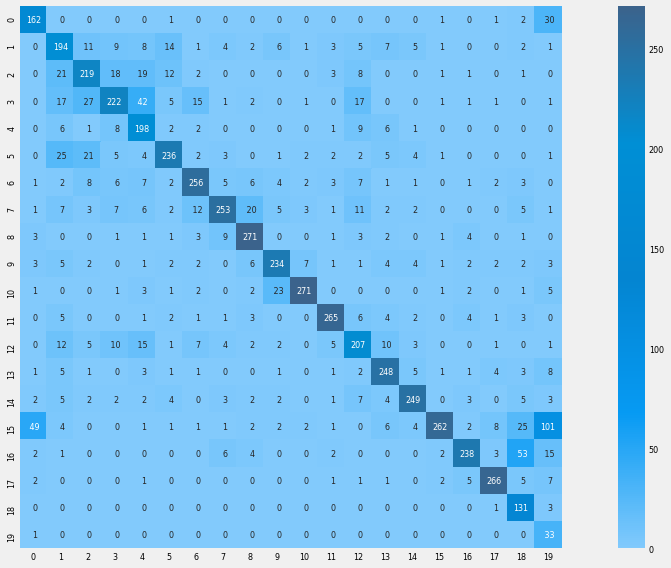

In [45]:
import seaborn.apionly as sns
cm = confusion_matrix(y,t_test)
plt.figure(figsize=(16,8))
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='3d',
                 annot_kws={'size': 8},
                 cmap = cmap)
plt.tight_layout()
plt.show()

In [46]:
print(classification_report(y,t_test))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76       197
           1       0.63      0.71      0.67       274
           2       0.73      0.72      0.72       305
           3       0.77      0.63      0.69       353
           4       0.63      0.85      0.73       234
           5       0.82      0.75      0.79       314
           6       0.83      0.81      0.82       317
           7       0.87      0.74      0.80       341
           8       0.84      0.90      0.87       301
           9       0.84      0.83      0.83       282
          10       0.94      0.87      0.90       313
          11       0.91      0.89      0.90       298
          12       0.72      0.73      0.73       285
          13       0.83      0.87      0.85       286
          14       0.89      0.84      0.86       296
          15       0.95      0.56      0.70       472
          16       0.90      0.73      0.81       326
          17       0.92    

In [47]:
from sklearn.svm import SVC
clf_svm = SVC(kernel='rbf', C=1e3, gamma=0.0001)

clf_svm = clf_svm.fit(X_train, t_train)
y_svm = clf_svm.predict(X_test)
print(accuracy_score(y_svm,t_test))

0.6881853555005306


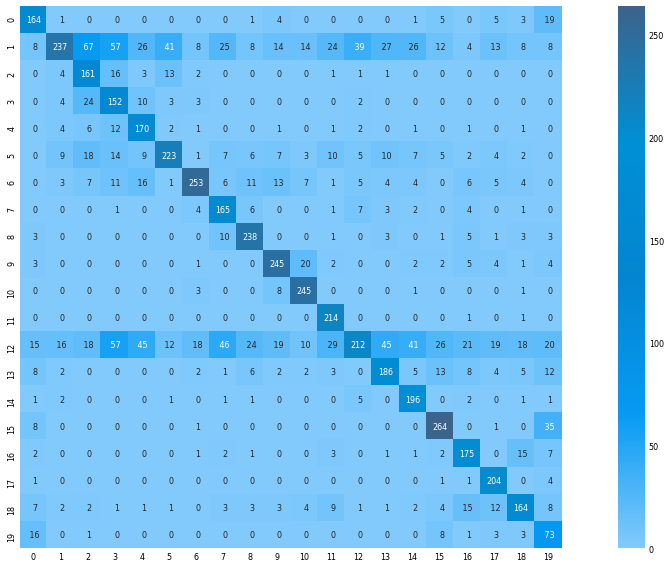

In [78]:
cm = confusion_matrix(y_svm,t_test)
plt.figure(figsize=(16,8))
hm = sns.heatmap(cm,cbar=True,annot=True,square=True, fmt='3d', annot_kws={'size': 8}, cmap = cmap)
plt.tight_layout()
plt.show()

In [69]:
# Training Support Vector Machines - SVM and calculating its performance

from sklearn.linear_model import SGDClassifier
text_clf_svm = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=50, random_state=42)

text_clf_svm = text_clf_svm.fit(X_train, t_train)
y_sgd = text_clf_svm.predict(X_test)
print(accuracy_score(y_sgd,t_test))

0.7854616200919703


In [68]:
text_clf_lr = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, max_iter=15, random_state=42)

text_clf_lr = text_clf_lr.fit(X_train, t_train)
y_lr = text_clf_lr.predict(X_test)
print(accuracy_score(y_lr,t_test))

0.6888928192430138


In [70]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha': (1e-2, 1e-3)}

In [71]:
gs_clf = GridSearchCV(text_clf_svm, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(X_red, t)

In [76]:
print(gs_clf.best_score_)
print(gs_clf.best_params_)

0.7760269066438269
{'alpha': 0.001}
